# Churn Modelling Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
chur_data = pd.read_excel(r"C:\Users\lenovo\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P3- Churn-Modelling Data - Copy.xlsx")
chur_data.shape

(10000, 14)

In [3]:
chur_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
churned              int64
dtype: object

In [4]:
chur_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Distribution of customers(churned / Not churned)

In [5]:
p = chur_data.groupby("churned").size()
p

churned
0    7963
1    2037
dtype: int64

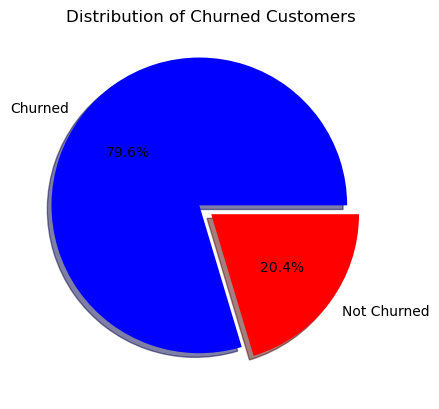

In [6]:
labels = ["Not Churned","Churned"]
colors = ['blue', 'red']
explode = (0.1, 0) 

plt.pie(p, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Churned Customers')
plt.show()

- What is the distribution of customers across different age groups?

In [7]:
chur_data.groupby("Age").size()

Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Length: 70, dtype: int64

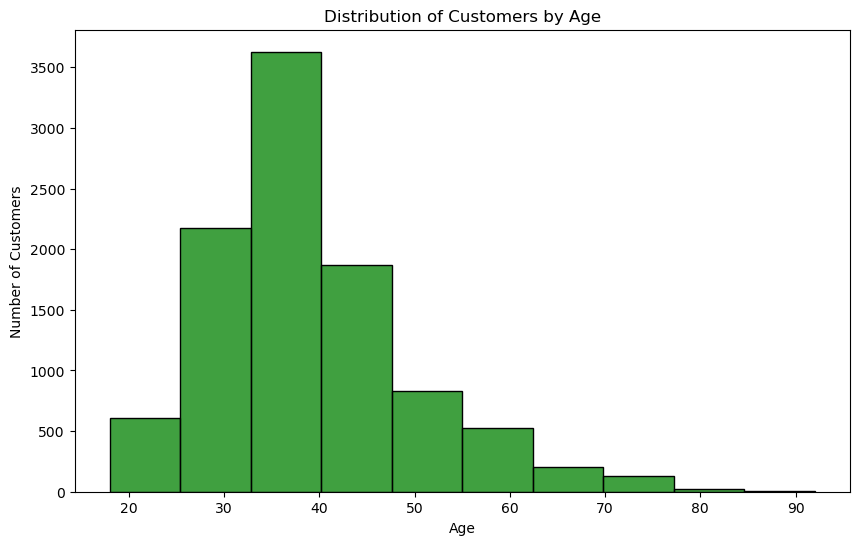

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(chur_data['Age'], bins=10,color="g")
plt.title('Distribution of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

- Analyze the gender distribution of customers.

In [9]:
gender_counts = chur_data['Gender'].value_counts()
gender_counts

Male      5457
Female    4543
Name: Gender, dtype: int64

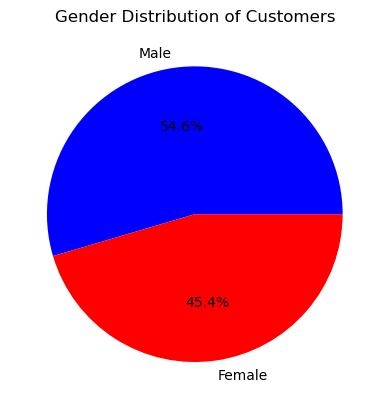

In [10]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Gender Distribution of Customers')
plt.show()

- What percentage of customers have churned?

In [11]:
churned_customers = chur_data["churned"].sum()
total_customers = chur_data["RowNumber"].count()
percentage_churned = (churned_customers / total_customers) * 100

In [12]:
print("Percentage of customers who have churned : ",percentage_churned)

Percentage of customers who have churned :  20.369999999999997


- What are the main reasons for customer churn?

- In order to identify the reason for churned customer let us examine various measures such as Tenure ,Geography and Gender

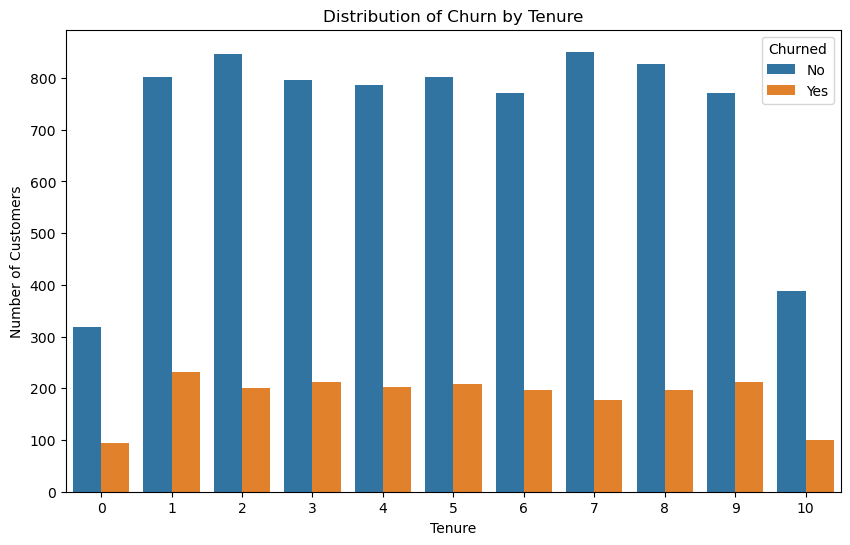

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=chur_data["Tenure"], hue='churned', data=chur_data)
plt.title("Distribution of Churn by Tenure")
plt.xlabel("Tenure")
plt.ylabel('Number of Customers')
plt.legend(title="Churned", labels=['No', 'Yes'])
plt.show()

- Customers with higher Tenure rate do not churn often indicating customer loyality

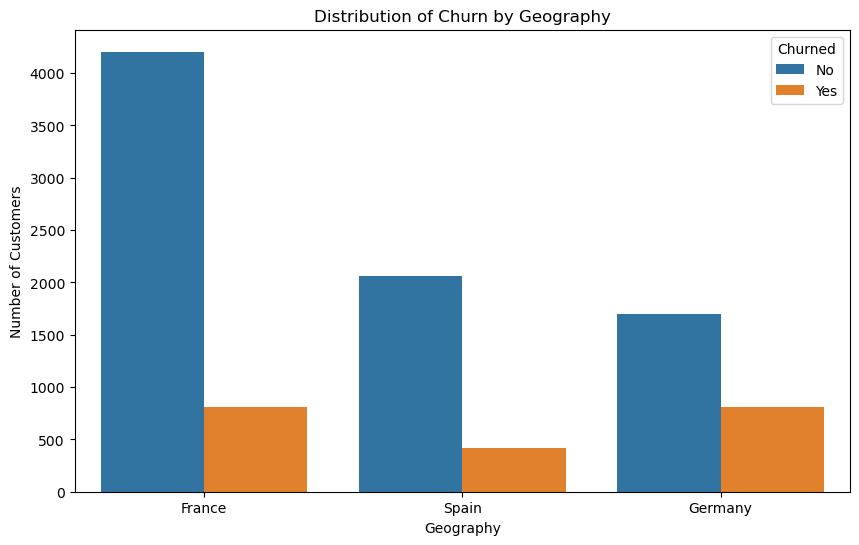

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=chur_data["Geography"], hue='churned', data=chur_data)
plt.title("Distribution of Churn by Geography")
plt.xlabel("Geography")
plt.ylabel('Number of Customers')
plt.legend(title="Churned", labels=['No', 'Yes'])
plt.show()

- germany has the highest churn rate and Customers in France Churn the least

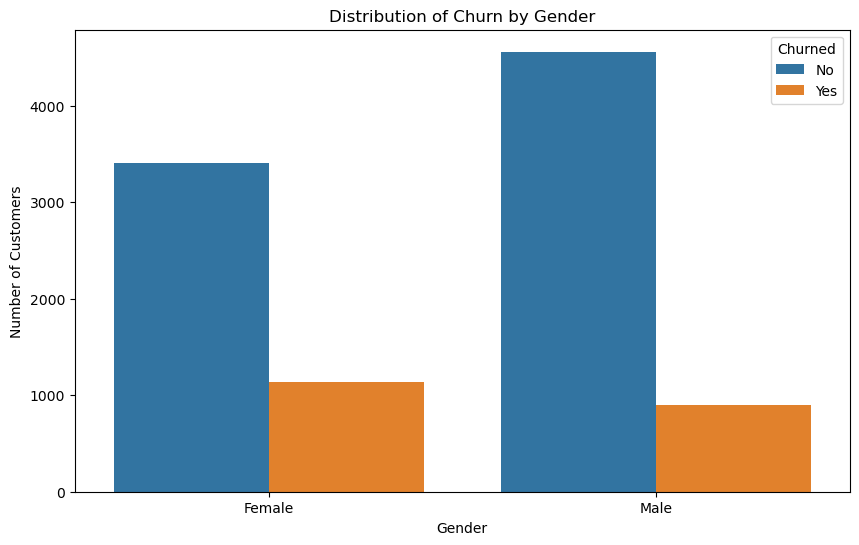

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x=chur_data["Gender"], hue='churned', data=chur_data)
plt.title("Distribution of Churn by Gender")
plt.xlabel("Gender")
plt.ylabel('Number of Customers')
plt.legend(title="Churned", labels=['No', 'Yes'])
plt.show()

- Gender based churned rate is not significant

- Identify any patterns or trends among customers who have churned.

In [16]:
churned_data = chur_data[chur_data['churned'] == 1]
print(churned_data.describe())

         RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  2037.000000  2.037000e+03  2037.000000  2037.000000  2037.000000   
mean   4905.917526  1.569005e+07   645.351497    44.837997     4.932744   
std    2866.855245  7.269262e+04   100.321503     9.761562     2.936106   
min       1.000000  1.556571e+07   350.000000    18.000000     0.000000   
25%    2419.000000  1.562736e+07   578.000000    38.000000     2.000000   
50%    4871.000000  1.568896e+07   646.000000    45.000000     5.000000   
75%    7404.000000  1.575309e+07   716.000000    51.000000     8.000000   
max    9999.000000  1.581566e+07   850.000000    84.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    2037.000000    2037.000000  2037.000000     2037.000000   
mean    91108.539337       1.475209     0.699067        0.360825   
std     58360.794816       0.801521     0.458776        0.480358   
min         0.000000       1.000000     0.000000    

- What are the most commonly used products or services?

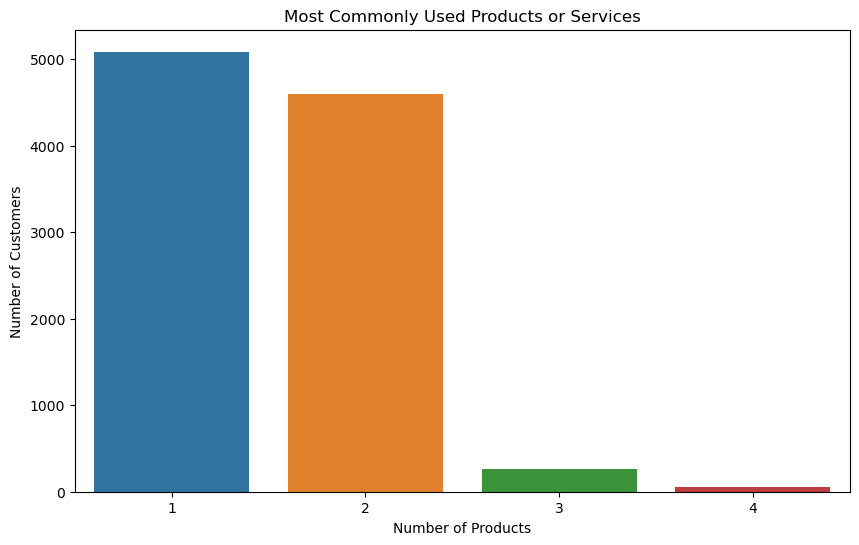

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=chur_data)
plt.title('Most Commonly Used Products or Services')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()

- Analyze the usage patterns of different customer segments.

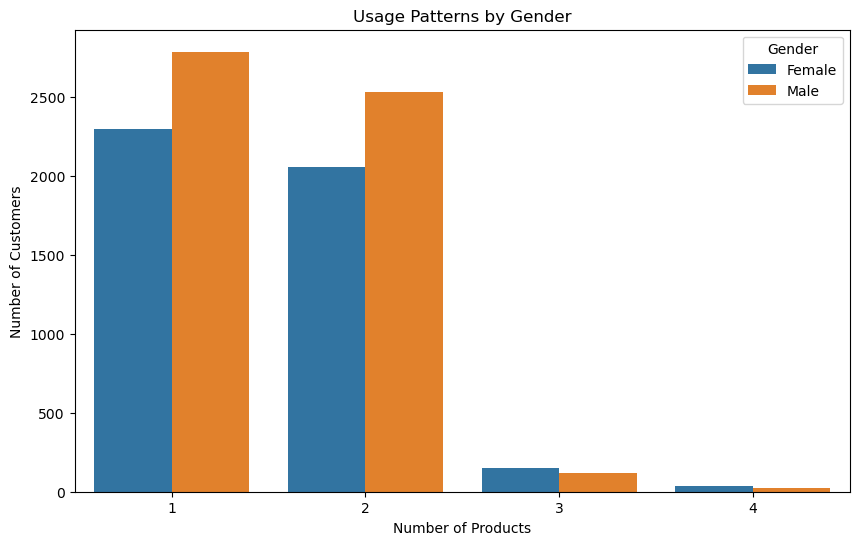

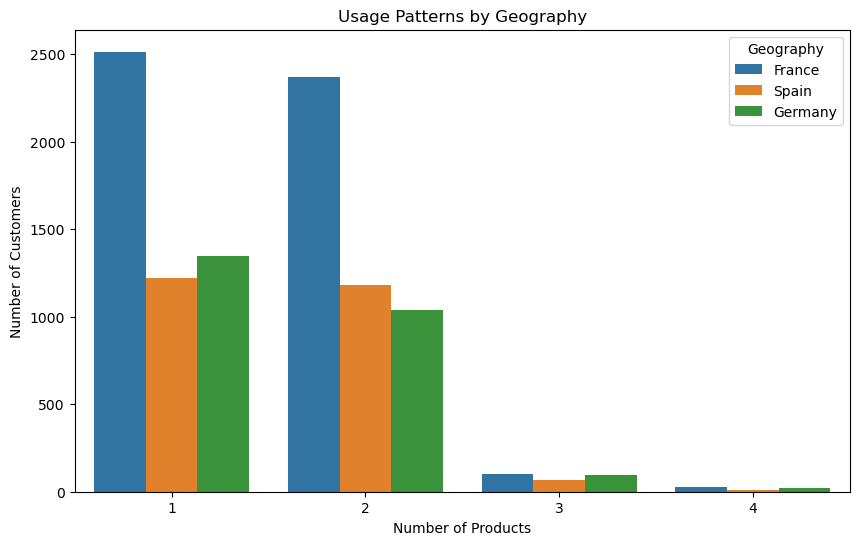

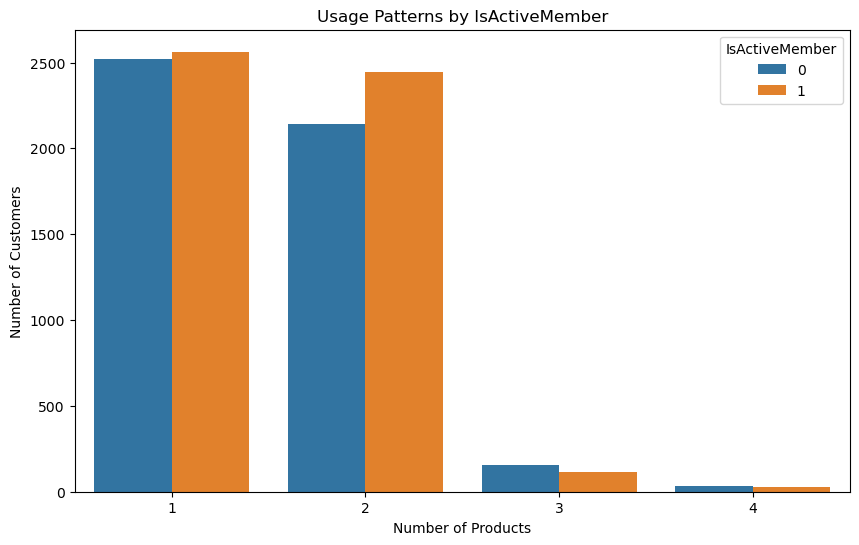

In [18]:
def usage_patterns_by_segment(segment):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='NumOfProducts', hue=segment, data=chur_data)
    plt.title(f'Usage Patterns by {segment}')
    plt.xlabel('Number of Products')
    plt.ylabel('Number of Customers')
    plt.legend(title=segment)
    plt.show()

usage_patterns_by_segment('Gender')
usage_patterns_by_segment('Geography')
usage_patterns_by_segment('IsActiveMember')


- What is the average account balance of customers?

In [19]:
average_balance = chur_data['Balance'].mean()
print(f'Average account balance of customers: Rs{average_balance:.2f}')

Average account balance of customers: Rs76485.89


- Compare the financial characteristics of churned vs. non-churned customers.

In [20]:
p = chur_data.groupby('churned')['Balance'].sum()

print(p.apply(lambda x: f'{x:,.2f}'))

churned
0    579,270,798.25
1    185,588,094.63
Name: Balance, dtype: object


In [21]:
def absolute_value(val):
    a  = int(val/100.*p.sum())
    return f'{a:,}'

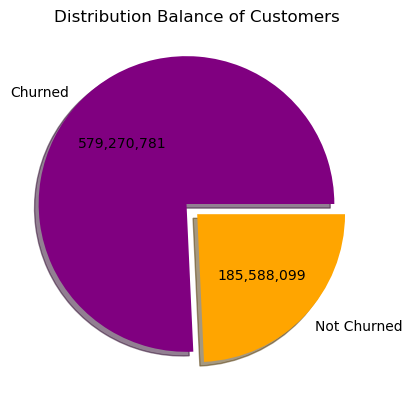

In [22]:
labels = ["Churned","Not Churned"]
colors = ['purple', 'orange']
explode = (0.1, 0) 

plt.pie(p, explode=explode, labels=labels, colors=colors, autopct=absolute_value, shadow=True)
plt.title('Distribution Balance of Customers')
plt.show()

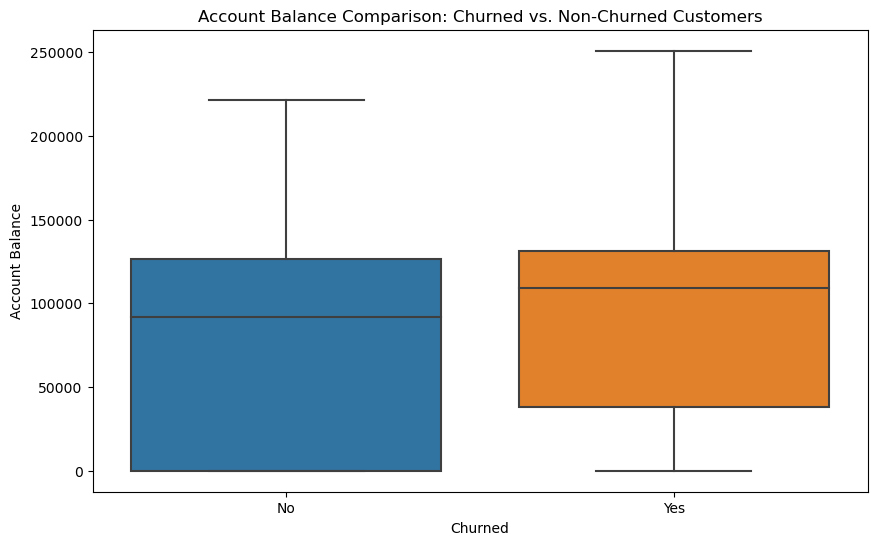

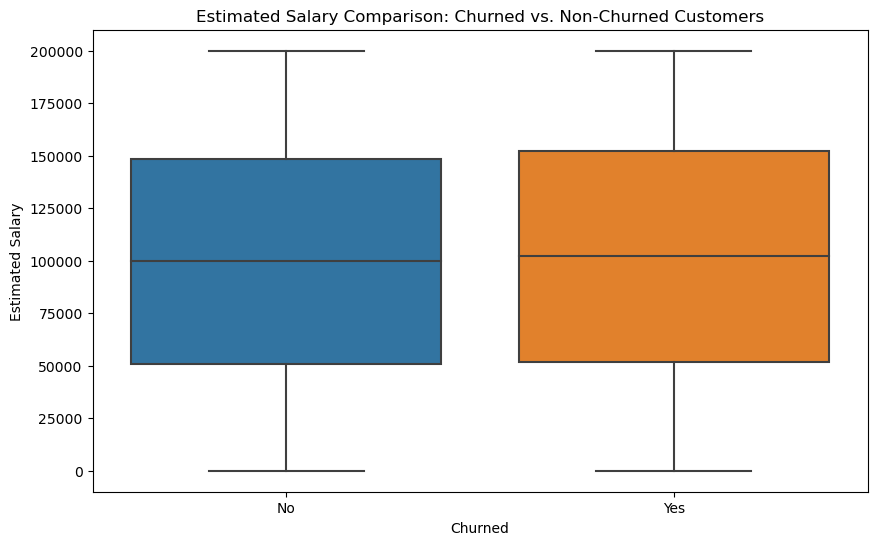

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='Balance', data=chur_data)
plt.title('Account Balance Comparison: Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='EstimatedSalary', data=chur_data)
plt.title('Estimated Salary Comparison: Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Estimated Salary')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
